In [29]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt #visualisasi
from termcolor import colored as cl # text customization
import itertools # advanced tools

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN Algorithm
from sklearn.linear_model import LogisticRegression # Logistic Regression Algorithm
from sklearn.svm import SVC #SVM Algorithm
from sklearn.ensemble import RandomForestClassifier # Random Forest Tree Algorithm

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score


In [30]:
df = pd.read_csv("creditcard.csv")
df.drop('Time', axis=1, inplace=True)

In [31]:
# Définir les variables d'entrée (X) et la cible (y)
x = df.drop('Class', axis=1)  # ou X si tu préfères
Y = df['Class']

In [32]:
# Équilibrage des classes (undersampling)
fraud_df = df[df['Class'] == 1]
non_fraud_df = df[df['Class'] == 0].sample(n=len(fraud_df), random_state=42)

balanced_df = pd.concat([fraud_df, non_fraud_df])
X_balanced = balanced_df.drop('Class', axis=1)
y_balanced = balanced_df['Class']

In [33]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [35]:
df.shape

(284807, 30)

In [36]:
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [37]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [38]:
sc = StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1,1))

print(cl(df['Amount'].head(10), attrs=['bold']))


0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


In [39]:
# Feature Selection and Data Split
X = df.drop('Class', axis=1).values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[:1])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:1])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:20])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:20])

X_train samples :  [[-1.11504743  1.03558276  0.80071244 -1.06039825  0.03262117  0.85342216
  -0.61424348 -3.23116112  1.53994798 -0.81690879 -1.30559201  0.1081772
  -0.85960958 -0.07193421  0.90665563 -1.72092961  0.79785322 -0.0067594
   1.95677806 -0.64489556  3.02038533 -0.53961798  0.03315649 -0.77494577
   0.10586781 -0.43085348  0.22973694 -0.0705913  -0.30145418]]
X_test samples :  [[-0.32333357  1.05745525 -0.04834115 -0.60720431  1.25982115 -0.09176072
   1.1591015  -0.12433461 -0.17463954 -1.64440065 -1.11886302  0.20264731
   1.14596495 -1.80235956 -0.24717793 -0.06094535  0.84660574  0.37945439
   0.84726224  0.18640942 -0.20709827 -0.43389027 -0.26161328 -0.04665061
   0.2115123   0.00829721  0.10849443  0.16113917 -0.19330595]]
y_train samples :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
y_test samples :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


0.9985463025789197


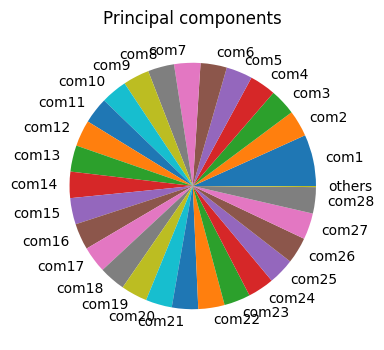

In [40]:
# Plot the principal components in pie chart, and only keep the components that 
# contains 95% information of original dataset.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
threshold = 0.95
for_test = 0
order = 0 
for index, ratio in enumerate(pca.explained_variance_ratio_):
    if threshold > for_test:
        for_test += ratio 
    else:
        order = index + 1 
        break 

print(pca.explained_variance_ratio_[:order].sum())
com_col = ['com'+ str(i+1) for i in range(order)]
com_col.append('others')
com_value = [i for i in pca.explained_variance_ratio_[:order]]
com_value.append(1-pca.explained_variance_ratio_[:order].sum())
plt.figure(figsize=[4,4])
plt.pie(x = com_value, labels = com_col)
plt.title('Principal components')
plt.show()

In [41]:
#Train Test split
from sklearn.model_selection import train_test_split

# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.3, random_state=1)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (199364, 29)
Number transactions y_train dataset:  (199364,)
Number transactions X_test dataset:  (85443, 29)
Number transactions y_test dataset:  (85443,)


In [42]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression()
lr1.fit(X_train, y_train)
predictions = lr1.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import RocCurveDisplay
acc1 = accuracy_score(y_test, predictions)
prec1 = precision_score(y_test, predictions )
rec1 = recall_score(y_test, predictions )
f11 = f1_score(y_test, predictions )
print('accuracy:%0.4f'%acc1,'\tprecision:%0.4f'%prec1,'\trecall:%0.4f'%rec1,'\tF1-score:%0.4f'%f11)
     

accuracy:0.9991 	precision:0.8242 	recall:0.5556 	F1-score:0.6637


C:\Users\karim\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.9992 	precision: 0.8316 	recall: 0.5852 	F1-score: 0.6870


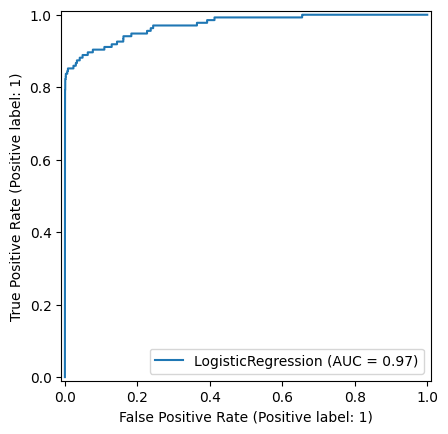

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définir et entraîner le modèle Logistic Regression
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_scaled, y_train)
# Prédictions
y_pred = lr.predict(X_test_scaled)

# Calcul des scores
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"accuracy: {acc:.4f} \tprecision: {prec:.4f} \trecall: {rec:.4f} \tF1-score: {f1:.4f}")
# Stocker les résultats dans un DataFrame
results_testset = pd.DataFrame([['Logistic Regression', acc, rec, prec, f1]],
               columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(lr, X_test_scaled, y_test)
plt.show()

In [44]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)
     

In [45]:
acc2 = accuracy_score(y_test, y_pred)
prec2 = precision_score(y_test, y_pred)
rec2 = recall_score(y_test, y_pred)
f12 = f1_score(y_test, y_pred)
print('accuracy:%0.4f'%acc2,'\tprecision:%0.4f'%prec2,'\trecall:%0.4f'%rec2,'\tF1-score:%0.4f'%f12)

accuracy:0.9995 	precision:0.9035 	recall:0.7630 	F1-score:0.8273


In [46]:
model_results = pd.DataFrame([['Random Forest', acc2,  rec2, prec2, f12]],
               columns = ['Model', 'Accuracy',  'Recall', 'Precision', 'F1 Score'])
results_testset = pd.concat([results_testset, model_results], ignore_index=True)


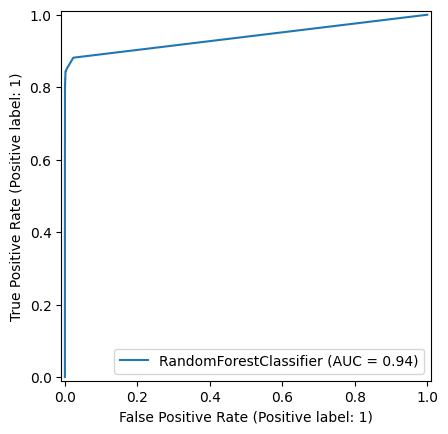

In [47]:
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

In [48]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
dt= DecisionTreeClassifier()

# Train Decision Tree Classifer
dt = dt.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_dt = dt.predict(X_test)
     

In [49]:
acc3 = accuracy_score(y_test, y_pred_dt)
prec3 = precision_score(y_test, y_pred_dt)
rec3 = recall_score(y_test, y_pred_dt)
f13 = f1_score(y_test, y_pred_dt)
print('accuracy:%0.4f'%acc3,'\tprecision:%0.4f'%prec3,'\trecall:%0.4f'%rec3,'\tF1-score:%0.4f'%f13)
     

accuracy:0.9991 	precision:0.7206 	recall:0.7259 	F1-score:0.7232


In [50]:
model_results = pd.DataFrame([['Decision Tree', acc3,  rec3, prec3, f13]],
               columns = ['Model', 'Accuracy',  'Recall', 'Precision', 'F1 Score'])
results_testset = pd.concat([results_testset, model_results], ignore_index=True)


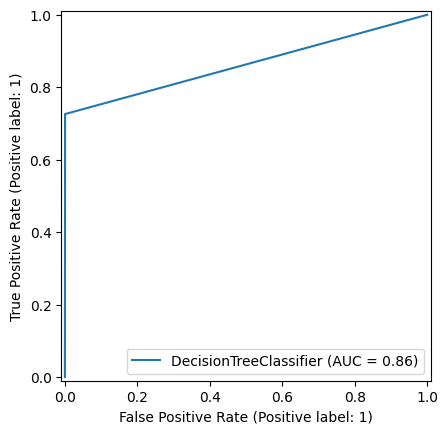

In [51]:
RocCurveDisplay.from_estimator(dt, X_test, y_test)
plt.show()

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, RocCurveDisplay
# Créer et entraîner le modèle KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Vous pouvez ajuster n_neighbors
knn.fit(X_train, y_train)
# Prédictions
y_pred_knn = knn.predict(X_test)

In [53]:
# Évaluation
acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
rec_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
print('accuracy:%0.4f' % acc_knn, '\tprecision:%0.4f' % prec_knn, '\trecall:%0.4f' % rec_knn, '\tF1-score:%0.4f' % f1_knn)


accuracy:0.9992 	precision:0.8889 	recall:0.5926 	F1-score:0.7111


In [54]:
# Stocker les résultats dans un DataFrame
model_results_knn = pd.DataFrame([['KNN', acc_knn, rec_knn, prec_knn, f1_knn]],
                                 columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])

# Ajouter les résultats au tableau global
results_testset = pd.concat([results_testset, model_results_knn], ignore_index=True)

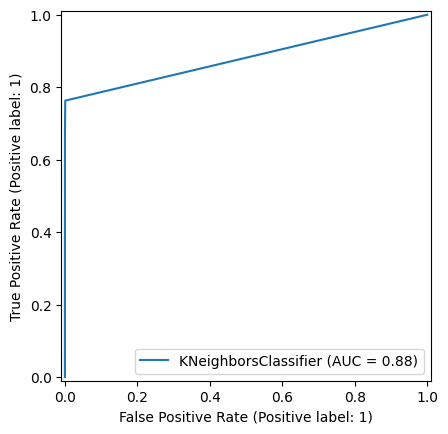

In [55]:
# Affichage de la courbe ROC
RocCurveDisplay.from_estimator(knn, X_test, y_test)
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, RocCurveDisplay

# Créer et entraîner le modèle SVM
svm_model = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

# Prédictions
y_pred_svm = svm_model.predict(X_test)

In [ ]:
# Évaluation
acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
rec_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print('accuracy:%0.4f' % acc_svm, '\tprecision:%0.4f' % prec_svm,
      '\trecall:%0.4f' % rec_svm, '\tF1-score:%0.4f' % f1_svm)

In [ ]:

# Stocker les résultats dans un DataFrame
model_results_svm = pd.DataFrame([['SVM', acc_svm, rec_svm, prec_svm, f1_svm]],
                                 columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])

# Ajouter les résultats au tableau global
results_testset = pd.concat([results_testset, model_results_svm], ignore_index=True)

In [ ]:
# Affichage de la courbe ROC
RocCurveDisplay.from_estimator(svm_model, X_test, y_test)
plt.title("Courbe ROC - SVM")
plt.show()

In [ ]:
# 3. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Compute confusion matrix for the models
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1]) # Random Forest Tree
tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1]) # K-Nearest Neighbors
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) # Support Vector Machine

In [ ]:
# Plot the confusion matrix
plt.rcParams['figure.figsize'] = (6, 6)

In [ ]:
# 1. Logistic regression
lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()

In [ ]:
# 2. Random forest tree
rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()

In [ ]:
# 3. Decision tree
tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

In [ ]:

# 4. K-Nearest Neighbors
knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()

In [ ]:
# 5. Support Vector Machine
svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()
